In [1]:
# --- 1. Импорт библиотек ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Увеличим размер графиков
plt.rcParams['figure.figsize'] = (10, 6)
sns.set()

print("Библиотеки загружены\n")

Библиотеки загружены



In [2]:
# --- 2. Загрузка данных ---
train_path = 'train.csv'
test_path = 'test.csv'

# Обучающие данные
home_data = pd.read_csv(train_path)
y = home_data['SalePrice']  # Целевая переменная

# Выбор признаков
features = [
    'LotArea',       # Площадь участка
    'YearBuilt',     # Год постройки
    '1stFlrSF',      # Площадь первого этажа
    '2ndFlrSF',      # Площадь второго этажа
    'FullBath',      # Количество ванных
    'BedroomAbvGr',  # Спальни
    'TotRmsAbvGrd'   # Общее количество комнат
]

X = home_data[features]
print("Данные загружены")
print(f"Размер обучающей выборки: {X.shape}")
print(f"Первые 5 строк:")
print(X.head())

Данные загружены
Размер обучающей выборки: (1460, 7)
Первые 5 строк:
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  



--- Описание данных ---
             LotArea    YearBuilt     1stFlrSF     2ndFlrSF     FullBath  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082  1971.267808  1162.626712   346.992466     1.565068   
std      9981.264932    30.202904   386.587738   436.528436     0.550916   
min      1300.000000  1872.000000   334.000000     0.000000     0.000000   
25%      7553.500000  1954.000000   882.000000     0.000000     1.000000   
50%      9478.500000  1973.000000  1087.000000     0.000000     2.000000   
75%     11601.500000  2000.000000  1391.250000   728.000000     2.000000   
max    215245.000000  2010.000000  4692.000000  2065.000000     3.000000   

       BedroomAbvGr  TotRmsAbvGrd  
count   1460.000000   1460.000000  
mean       2.866438      6.517808  
std        0.815778      1.625393  
min        0.000000      2.000000  
25%        2.000000      5.000000  
50%        3.000000      6.000000  
75%        3.000000      7.000000  
ma

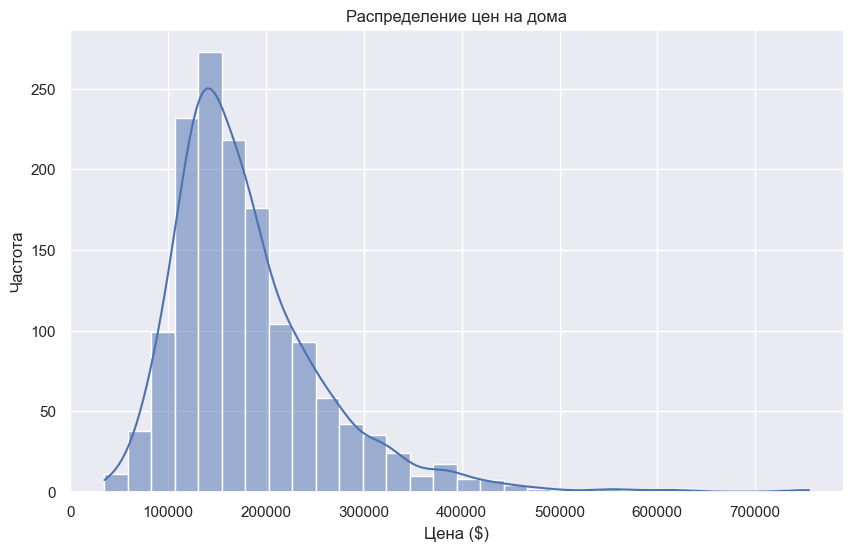


--- Матрица корреляции ---


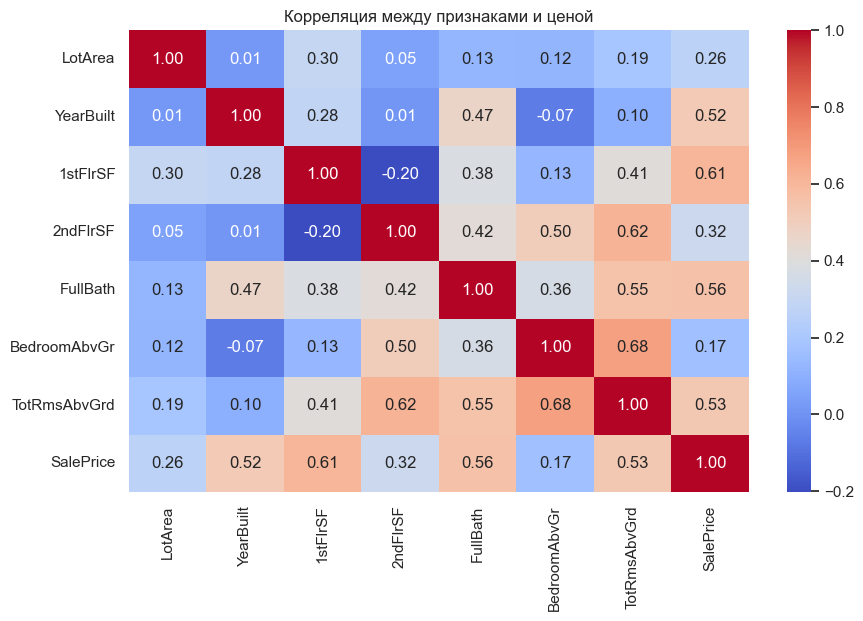

In [3]:
# --- 3. Исследовательский анализ данных (EDA) ---
print("\n--- Описание данных ---")
print(X.describe())

print("\n--- Распределение целевой переменной (цена) ---")
sns.histplot(y, kde=True, bins=30)
plt.title("Распределение цен на дома")
plt.xlabel("Цена ($)")
plt.ylabel("Частота")
plt.show()

print("\n--- Матрица корреляции ---")
corr_matrix = X.copy()
corr_matrix['SalePrice'] = y
sns.heatmap(corr_matrix.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляция между признаками и ценой")
plt.show()

In [4]:
# --- 4. Разделение данных ---
train_X, val_X, train_y, val_y = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=1
)

print(f"Обучение: {train_X.shape[0]} объектов")
print(f"Валидация: {val_X.shape[0]} объектов")

Обучение: 1168 объектов
Валидация: 292 объектов


In [5]:
# --- 5. Обучение модели ---
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)

# Предсказания на валидации
val_preds = rf_model.predict(val_X)
val_mae = mean_absolute_error(val_preds, val_y)

print(f"\nMAE на валидации: ${val_mae:,.0f}")


MAE на валидации: $22,256


In [6]:
# --- 6. Обучение на всех данных ---
rf_model_full = RandomForestRegressor(random_state=1)
rf_model_full.fit(X, y)

print("Модель обучена на всех данных")

Модель обучена на всех данных


In [7]:
# --- 7. Загрузка тестовых данных и предсказание ---
test_data = pd.read_csv(test_path)
test_X = test_data[features]

# Предсказания
test_preds = rf_model_full.predict(test_X)
print(f"Сделано {len(test_preds)} предсказаний")

# Сохранение результата (если нужно отправить на Kaggle)
output = pd.DataFrame({
    'Id': test_data.Id,
    'SalePrice': test_preds
})
output.to_csv('submission.csv', index=False)
print("Файл submission.csv сохранён")

Сделано 1459 предсказаний
Файл submission.csv сохранён



--- Важность признаков ---
        feature  importance
1     YearBuilt    0.361764
2      1stFlrSF    0.331273
3      2ndFlrSF    0.151974
0       LotArea    0.073725
6  TotRmsAbvGrd    0.051499
5  BedroomAbvGr    0.017304
4      FullBath    0.012461


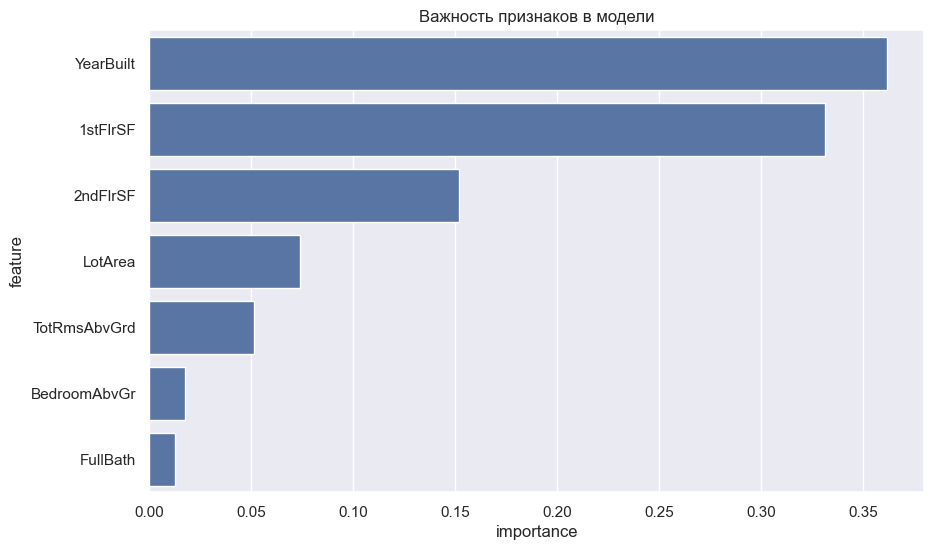

In [8]:
# --- 8. Важность признаков ---
importances = rf_model_full.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\n--- Важность признаков ---")
print(feature_importance_df)

sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title("Важность признаков в модели")
plt.show()

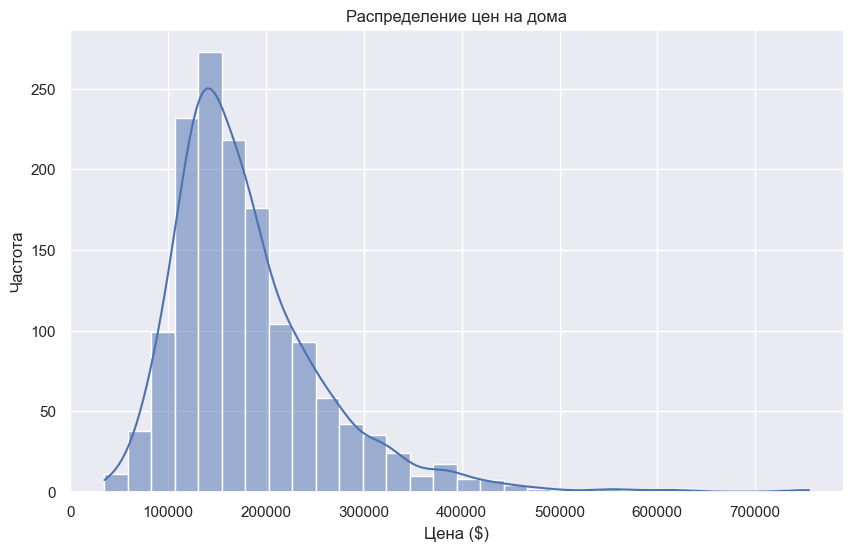

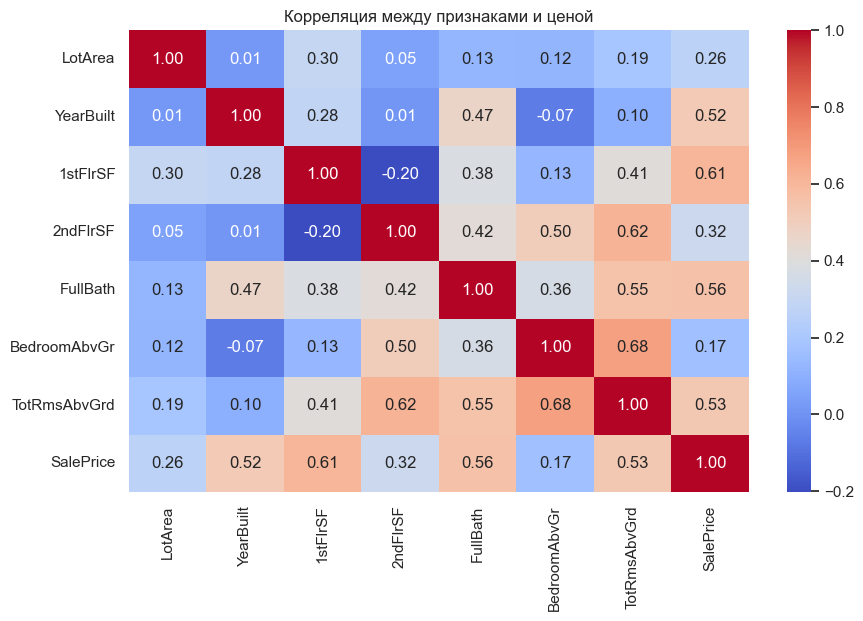

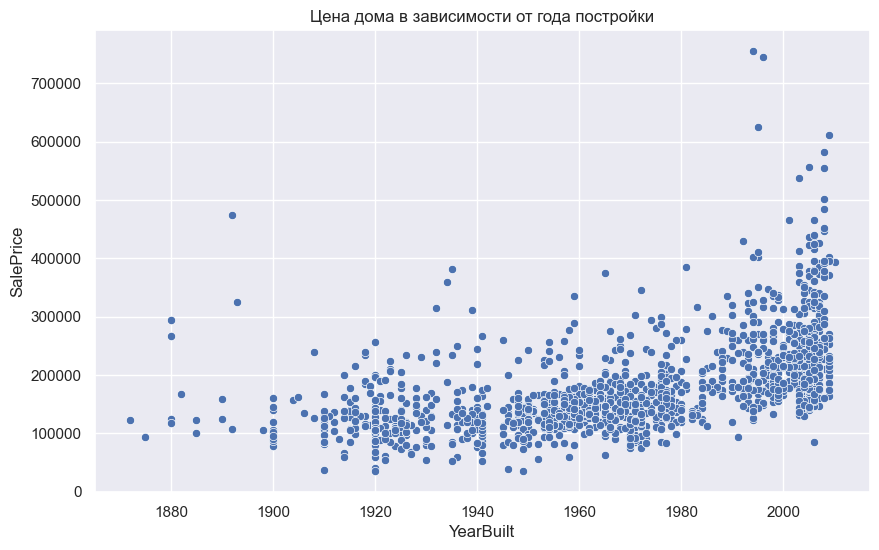

In [26]:
# --- Визуализация ---

plt.rcParams['figure.figsize'] = (10, 6)

# Распределение цен
sns.histplot(y, kde=True, bins=30)
plt.title("Распределение цен на дома")
plt.xlabel("Цена ($)")
plt.ylabel("Частота")
plt.show()

# Корреляция признаков
corr_matrix = home_data[features + ['SalePrice']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляция между признаками и ценой")
plt.show()

# Цена vs год постройки
sns.scatterplot(data=home_data, x='YearBuilt', y='SalePrice')
plt.title("Цена дома в зависимости от года постройки")
plt.show()